In [76]:
# Import pandas library
import pandas as pd

# Read in the data file
data_file = pd.read_csv('data/2315676.txt', delim_whitespace=True, na_values=-9999, skiprows = [1])

# Check the first five rows of the data frame to confirm that the missing values have been converted to NA values
print(data_file.head())

# Print the tail of the file
print(data_file.tail())


             STATION      STATION_NAME      DATE  TAVG  TMAX  TMIN
0  GHCND:FI000007501  SODANKYLA-AWS-FI  19080101   NaN   2.0 -37.0
1  GHCND:FI000007501  SODANKYLA-AWS-FI  19080102   NaN   6.0 -26.0
2  GHCND:FI000007501  SODANKYLA-AWS-FI  19080103   NaN   7.0 -27.0
3  GHCND:FI000007501  SODANKYLA-AWS-FI  19080104   NaN  -3.0 -27.0
4  GHCND:FI000007501  SODANKYLA-AWS-FI  19080105   NaN   4.0 -36.0
                 STATION      STATION_NAME      DATE  TAVG  TMAX  TMIN
41060  GHCND:FI000007501  SODANKYLA-AWS-FI  20201003  47.0  51.0   NaN
41061  GHCND:FI000007501  SODANKYLA-AWS-FI  20201004  43.0  47.0  37.0
41062  GHCND:FI000007501  SODANKYLA-AWS-FI  20201005  42.0   NaN  37.0
41063  GHCND:FI000007501  SODANKYLA-AWS-FI  20201006  45.0  46.0  43.0
41064  GHCND:FI000007501  SODANKYLA-AWS-FI  20201007  47.0  50.0  44.0


In [77]:
# Calculate estimates of the average daily temperature for missing values
missing_tavg = data_file['TAVG'].isna()
data_file.loc[missing_tavg, 'TAVG'] = (data_file.loc[missing_tavg, 'TMAX'] + data_file.loc[missing_tavg, 'TMIN']) / 2

# Drop any remaining missing values in the TAVG column
data_file = data_file.dropna(subset=['TAVG'])

# Check the first five rows of the data frame to confirm that missing values have been filled in and dropped
print(data_file.head())

             STATION      STATION_NAME      DATE  TAVG  TMAX  TMIN
0  GHCND:FI000007501  SODANKYLA-AWS-FI  19080101 -17.5   2.0 -37.0
1  GHCND:FI000007501  SODANKYLA-AWS-FI  19080102 -10.0   6.0 -26.0
2  GHCND:FI000007501  SODANKYLA-AWS-FI  19080103 -10.0   7.0 -27.0
3  GHCND:FI000007501  SODANKYLA-AWS-FI  19080104 -15.0  -3.0 -27.0
4  GHCND:FI000007501  SODANKYLA-AWS-FI  19080105 -16.0   4.0 -36.0


In [78]:
# A function to convert a temperature value in Fahrenheit to Celsius
def fahrenheit_to_celsius(temp_fahrenheit):
    return (temp_fahrenheit - 32) / 1.8


# Create a new column called TAVG_C that contains the converted Celsius temperature values rounded to 1 decimal
data_file["TAVG_C"] = round(data_file["TAVG"].apply(fahrenheit_to_celsius), 1)
# This line does the same as above, but for the TMAX column, creating a new column called TMAX_C
data_file["TMAX_C"] = round(data_file["TMAX"].apply(fahrenheit_to_celsius), 1)
# This line does the same as above, but for the TMIN column, creating a new column called TMIN_C
data_file["TMIN_C"] = round(data_file["TMIN"].apply(fahrenheit_to_celsius), 1)

# Check the first five rows of the data frame to confirm that temperatures have been converted to Celsius
print(data_file.head())

             STATION      STATION_NAME      DATE  TAVG  TMAX  TMIN  TAVG_C  \
0  GHCND:FI000007501  SODANKYLA-AWS-FI  19080101 -17.5   2.0 -37.0   -27.5   
1  GHCND:FI000007501  SODANKYLA-AWS-FI  19080102 -10.0   6.0 -26.0   -23.3   
2  GHCND:FI000007501  SODANKYLA-AWS-FI  19080103 -10.0   7.0 -27.0   -23.3   
3  GHCND:FI000007501  SODANKYLA-AWS-FI  19080104 -15.0  -3.0 -27.0   -26.1   
4  GHCND:FI000007501  SODANKYLA-AWS-FI  19080105 -16.0   4.0 -36.0   -26.7   

   TMAX_C  TMIN_C  
0   -16.7   -38.3  
1   -14.4   -32.2  
2   -13.9   -32.8  
3   -19.4   -32.8  
4   -15.6   -37.8  


In [79]:
# Extract year and month information from the DATE column as strings and storing them in new columns YEAR and MONTH
data_file["YEAR"] = data_file["DATE"].astype(str).str.slice(start=0, stop=4)
data_file["MONTH"] = data_file["DATE"].astype(str).str.slice(start=4, stop=6)

# Loop over each row in the data_file
for i, row in data_file.iterrows():
    if data_file.at[i,"MONTH"] == '12' or data_file.at[i, "MONTH"]== '01' or data_file.at[i, "MONTH"] == '02':
        data_file.at[i,"SEASON"] = 'Winter'
        
    elif data_file.at[i, "MONTH"] == '03' or data_file.at[i, "MONTH"] == '04' or data_file.at[i, "MONTH"] == '05':
        data_file.at[i, "SEASON"] ='Spring'
        
    elif data_file.at[i,"MONTH"] == '06' or data_file.at[i, "MONTH"] =='07' or data_file.at[i, "MONTH"] == '08':
        data_file.at[i,"SEASON"] = 'Summer'
        
    elif data_file.at[i, "MONTH"] == '09' or data_file.at[i, "MONTH"] == '10' or data_file.at[i, "MONTH"] == '11':
        data_file.at[i,"SEASON"] = 'Autumn'

# Group the data by year and season, then calculating the mean temperature for each group and storing the result in a new variable seasonal_temps        
seasonal_temps = data_file.groupby(['YEAR', 'SEASON'])['TAVG_C'].mean()
# Print the seasonal temperatures and round to one decimal
print(round(seasonal_temps, 1))

YEAR  SEASON
1908  Autumn    -1.9
      Spring    -2.4
      Summer    11.4
      Winter   -12.3
1909  Autumn    -0.2
                ... 
2019  Winter   -11.4
2020  Autumn     7.7
      Spring    -0.8
      Summer    14.4
      Winter    -9.2
Name: TAVG_C, Length: 452, dtype: float64


In [80]:
# Convert the YEAR column from a string to an integer
data_file["YEAR"] = data_file["YEAR"].astype(int)
# Filter data_file to include only data between 1951 and 1980
period = data_file.loc[(data_file["YEAR"] >= 1951) & (data_file["YEAR"] <= 1980)]
# Calculate the average temperature for each season during the reference period
seasonal_ref = period.groupby("SEASON")["TAVG_C"].mean().to_frame(name = 'ref_temp_avg')
# Print the average temperature for each season and round to one decimal
print(round(seasonal_ref, 1))

        ref_temp_avg
SEASON              
Autumn          -0.8
Spring          -2.3
Summer          12.4
Winter         -13.6


In [81]:
# Save the date in seasonal_temps variable to csv file
seasonal_temps.to_csv('seasonal_temps.csv')
# Read the csv file
read_seasonal_temps = pd.read_csv('seasonal_temps.csv')

# Print the data in csv file and round to one decimal
print(round(read_seasonal_temps, 1))

     YEAR  SEASON  TAVG_C
0    1908  Autumn    -1.9
1    1908  Spring    -2.4
2    1908  Summer    11.4
3    1908  Winter   -12.3
4    1909  Autumn    -0.2
..    ...     ...     ...
447  2019  Winter   -11.4
448  2020  Autumn     7.7
449  2020  Spring    -0.8
450  2020  Summer    14.4
451  2020  Winter    -9.2

[452 rows x 3 columns]


In [82]:
# Merge data in seasonal_ref variable to csv file
merge_seasonal_ref = read_seasonal_temps.merge(seasonal_ref, left_on = 'SEASON', right_on = 'SEASON')
# Print the data in csv file and round to one decimal
print(round(merge_seasonal_ref, 1))

     YEAR  SEASON  TAVG_C  ref_temp_avg
0    1908  Autumn    -1.9          -0.8
1    1909  Autumn    -0.2          -0.8
2    1910  Autumn    -1.7          -0.8
3    1911  Autumn    -1.3          -0.8
4    1912  Autumn    -2.1          -0.8
..    ...     ...     ...           ...
447  2016  Winter   -11.2         -13.6
448  2017  Winter   -10.1         -13.6
449  2018  Winter   -11.6         -13.6
450  2019  Winter   -11.4         -13.6
451  2020  Winter    -9.2         -13.6

[452 rows x 4 columns]


In [83]:
# Calculate seasonal temperature anomalies for each year
merge_seasonal_ref["difference"] = merge_seasonal_ref["TAVG_C"] - merge_seasonal_ref["ref_temp_avg"]
# Print seasonal temperature anomalies for each year
print(merge_seasonal_ref)

     YEAR  SEASON     TAVG_C  ref_temp_avg  difference
0    1908  Autumn  -1.857955     -0.814731   -1.043224
1    1909  Autumn  -0.156098     -0.814731    0.658633
2    1910  Autumn  -1.745714     -0.814731   -0.930984
3    1911  Autumn  -1.280247     -0.814731   -0.465516
4    1912  Autumn  -2.072619     -0.814731   -1.257888
..    ...     ...        ...           ...         ...
447  2016  Winter -11.193407    -13.553102    2.359695
448  2017  Winter -10.113333    -13.553102    3.439769
449  2018  Winter -11.557778    -13.553102    1.995324
450  2019  Winter -11.395556    -13.553102    2.157546
451  2020  Winter  -9.195000    -13.553102    4.358102

[452 rows x 5 columns]


Text(0, 0.5, 'Temperature in Celsius')

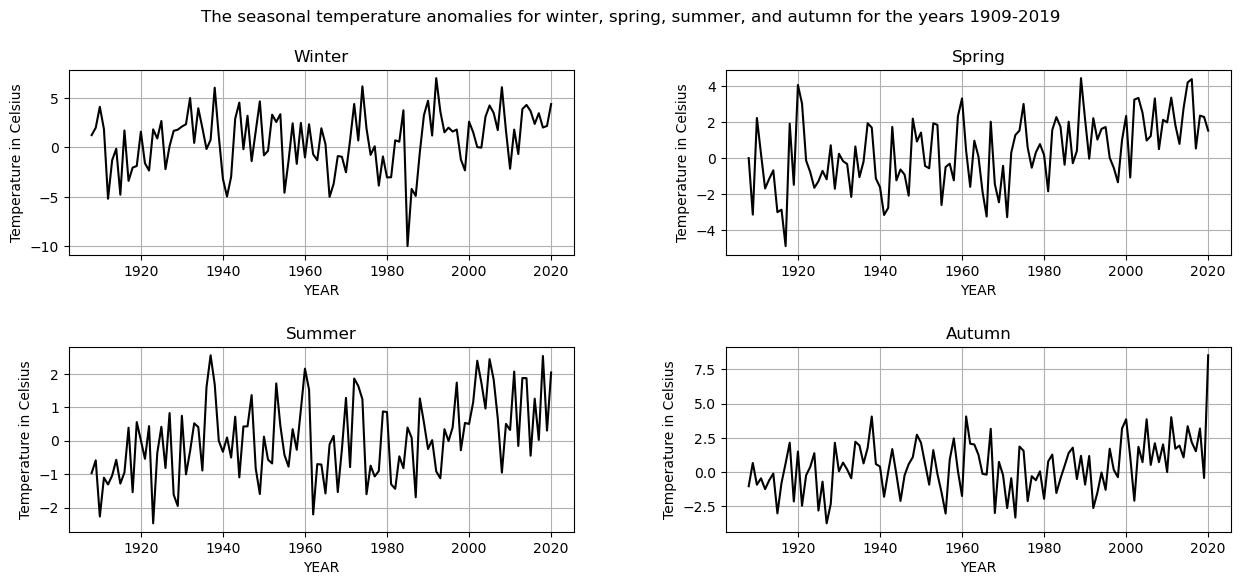

In [127]:
# Import the matplotlib library
import matplotlib.pyplot as plt

# Create a dataframe for each season using
plot_winter = merge_seasonal_ref[merge_seasonal_ref["SEASON"] == "Winter"]
plot_summer = merge_seasonal_ref[merge_seasonal_ref["SEASON"] == "Summer"]
plot_spring = merge_seasonal_ref[merge_seasonal_ref["SEASON"] == "Spring"]
plot_autumn = merge_seasonal_ref[merge_seasonal_ref["SEASON"] == "Autumn"]

# Create a figure with 2 rows and 2 columns of subplots with a specified size
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))
# adjust the vertical and horizontal space between the subplots
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Assign each subplot to a variable
ax_winter = axes[0][0]
ax_spring = axes[0][1]
ax_summer = axes[1][0]
ax_autumn = axes[1][1]

# Set the color, line style and grid lines
plot_winter["difference"].plot(ax = ax_winter, color = "black", linestyle = '-', grid = True)
plot_spring["difference"].plot(ax = ax_spring, color = "black", linestyle = '-', grid = True)
plot_summer["difference"].plot(ax = ax_summer, color = "black", linestyle = '-', grid = True)
plot_autumn["difference"].plot(ax = ax_autumn, color = "black", linestyle = '-', grid = True)

# set the main title for the figure
fig.suptitle("The seasonal temperature anomalies for winter, spring, summer, and autumn for the years 1909-2019")

# Set titles for each plot
ax_winter.set_title("Winter")
ax_spring.set_title("Spring")
ax_summer.set_title("Summer")
ax_autumn.set_title("Autumn")

# Set the y-axis label for each plot
ax_winter.set_ylabel("Temperature in Celsius")
ax_summer.set_ylabel("Temperature in Celsius")
ax_spring.set_ylabel("Temperature in Celsius")
ax_autumn.set_ylabel("Temperature in Celsius")